In [3]:
# QFT 一般化量子傅立葉變換
from qiskit import QuantumRegister,QuantumCircuit
from math import pi
def qft(n):
    ar = QuantumRegister(n,'a')
    qc = QuantumCircuit(ar)
    # hbit for h gate
    for hbit in range(n-1,-1,-1):
        qc.h(hbit)
        for cbit in range(hbit):
            qc.cp(pi/2**(hbit-cbit),cbit,hbit)
            # for swap
    for bit in range(n//2):
        qc.swap(bit,n-bit-1)
    return qc

In [4]:
# IQFT 逆量子傅立葉變換
from qiskit import QuantumRegister,QuantumCircuit
from math import pi
def iqft(n):
    br = QuantumRegister(n,'b')
    qc = QuantumCircuit(br)
    # sbit: for swap qubit
    for sbit in range(n//2):
        qc.swap(sbit,n-sbit-1)
    for hbit in range(0,n,1):
        # cbit: for count qubit
        for cbit in range(hbit-1,-1,-1):
            qc.cp(-pi/2**(hbit-cbit),cbit,hbit)
        qc.h(hbit)
    return qc

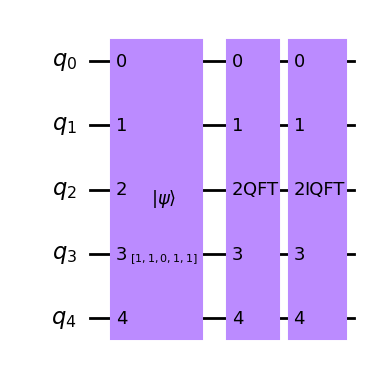

Statevector before QFT:


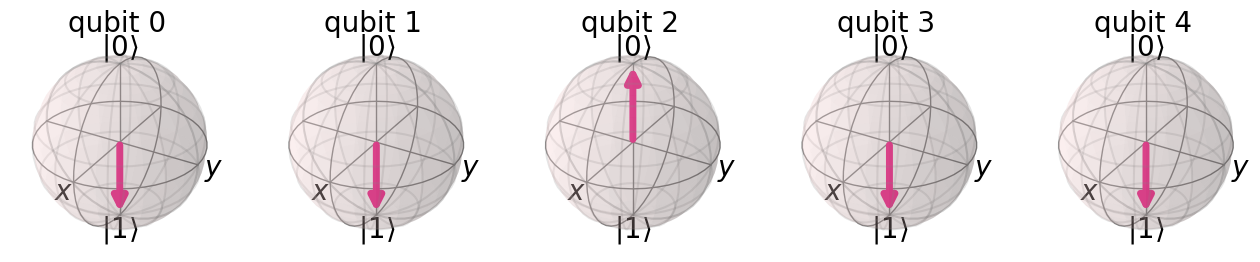

Statevector after QFT:


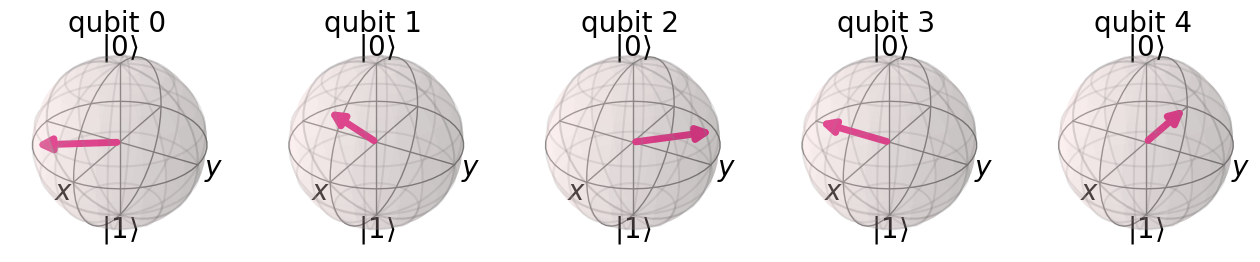

Statevector after IQFT:


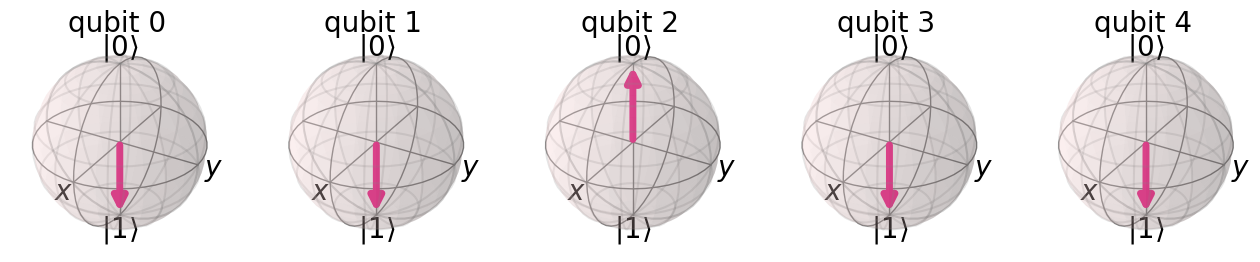

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(5)
qc.initialize('11011',range(5))
state0 = Statevector.from_instruction(qc)
qc.append(qft(5).to_gate(label='QFT'),range(5))
state1 = Statevector.from_instruction(qc)
qc.append(iqft(5).to_gate(label='IQFT'),range(5))
state2 = Statevector.from_instruction(qc)
display(qc.draw('mpl'))
print('Statevector before QFT:')
display(state0.draw('bloch'))
print('Statevector after QFT:')
display(state1.draw('bloch'))
print('Statevector after IQFT:')
display(state2.draw('bloch'))